# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
# Import the libraries you'll need here.
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns
# This command tells python to use seaborn for its styling.
sns.set()

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# Provides z-score helper function
import scipy.stats as stats
# Meriselle Ruotolo

# Load the cars csv file into a pandas dataframe.


In [2]:
# Load the csv file into a pandas dataframe.
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())
df.duplicated().shape[0] # Did shape since i didnt want all the extra stuff

720


11914

In [4]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()
print(df.shape[0])

11194


In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
df.duplicated().sum()

0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?
print(df.isnull().sum())
print('Engine HP has the most null values')

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64
Engine HP has the most null values


In [7]:
# * Print how long (aka how many rows) our dataframe is.
df.shape[0]

11194

In [8]:
# * Remove any row that has a null value in it. 
df = df.dropna()

In [9]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print(df.shape[0])
print(df.isnull().sum())

11092
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

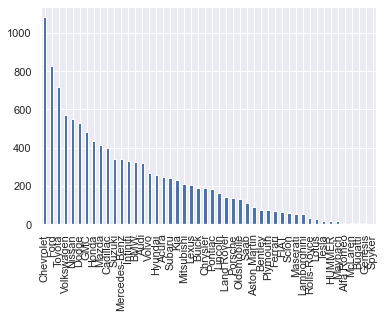

In [5]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
# Find the mean sepal_length for each of the classes 
gb = df.groupby('Make')['Make'].count()
gb = df['Make'].value_counts() # sorted

# Make a bar plot of said means
gb.plot(kind='bar');

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

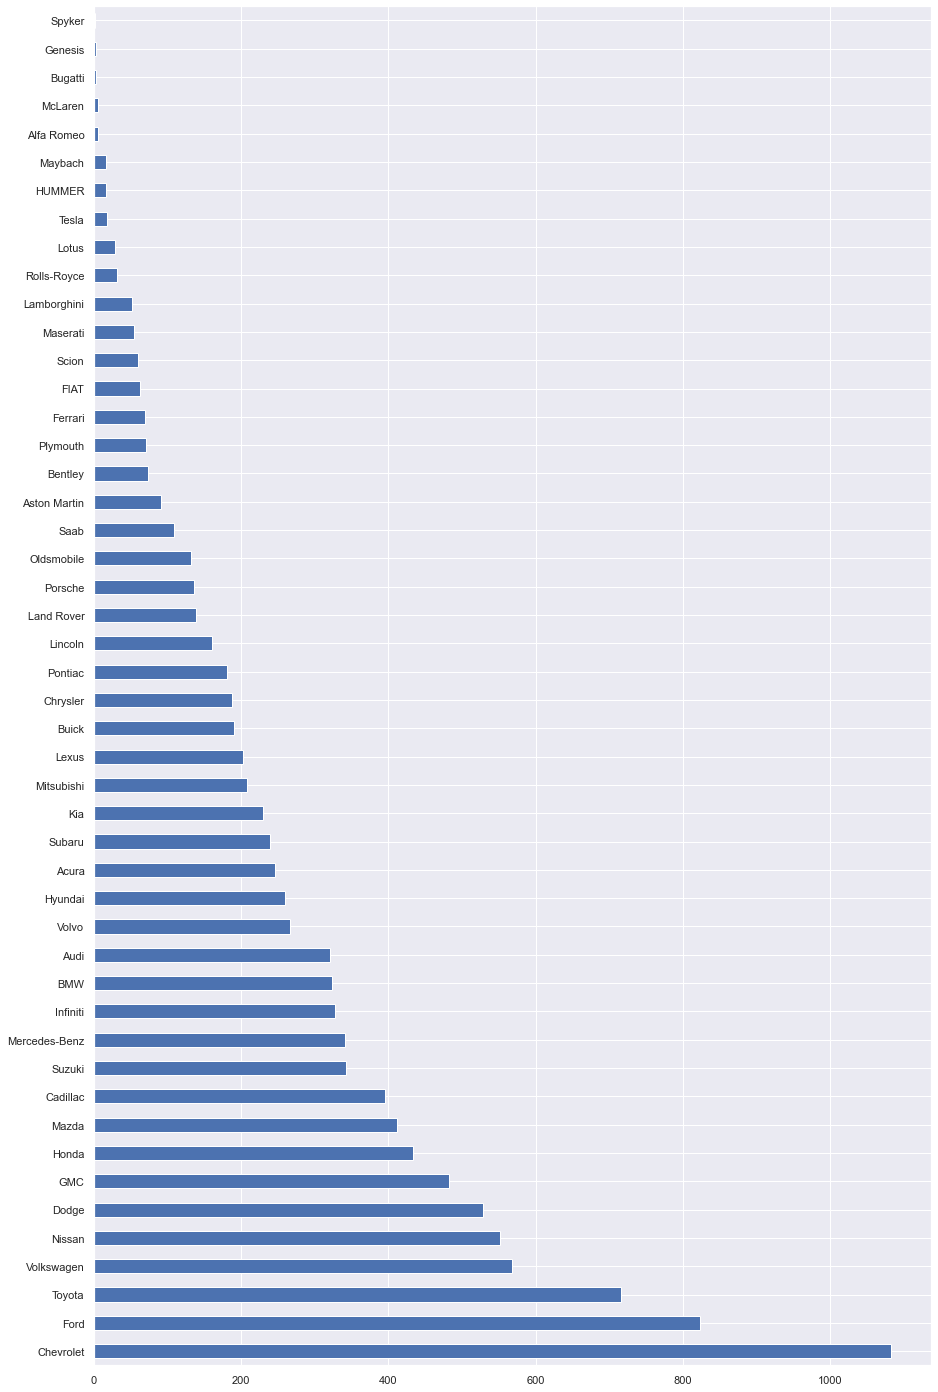

In [6]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.
gb.plot(kind='barh', figsize = (15, 25));


### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


Year
1990     2032.272727
1991     2120.196078
1992     2108.346457
1993     2244.693750
1994     2394.271318
1995     2700.128205
1996     2566.565217
1997     3164.644578
1998     3036.151724
1999     3153.850877
2000     3197.104348
2001    41500.666667
2002    33744.156098
2003    39774.063025
2004    36107.336170
2005    36746.971831
2006    32074.850515
2007    35278.404192
2008    56753.838509
2009    50457.504132
2010    52021.117438
2011    57570.003521
2012    61959.133903
2013    51475.760000
2014    65523.254513
2015    47514.147771
2016    47871.917471
2017    42191.815887
Name: MSRP, dtype: float64

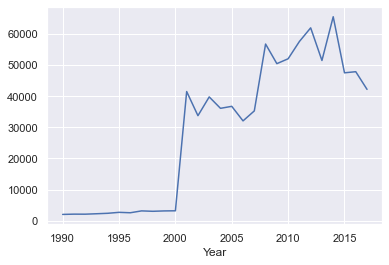

In [9]:
df_year = df.groupby('Year')['MSRP'].mean()
#sns.scatterplot(data=df_year, x='Year', y='MSRP');
df_year.plot(kind='line', x = 'Year', y = 'MSRP')

# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.  
_Hint use `np.where()`_.

In [11]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.
condition_before2000 = df['Year'] <= 2000
df['adjusted_price'] = np.where(condition_before2000, df['MSRP'] * 10, df['MSRP'])

df[condition_before2000].head() # to show that before 2000 were correctly adjusted
#df.head() # to show the rest were not changed

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,20000
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,20000
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,21,16,3105,2000,20000
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,20000
23,Audi,100,1993,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,20000


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

(0.0, 100000.0)

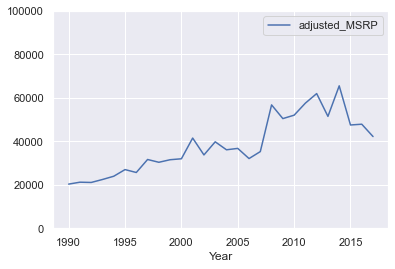

In [12]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000
df_adjusted_price = df.groupby('Year')['adjusted_price'].mean().reset_index(name = 'adjusted_MSRP')
df_adjusted_price.plot(kind='line', x = 'Year', y = 'adjusted_MSRP')
plt.ylim([0, 100000])

# What car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. _Hint, you can use df.head(5) for this_.
* Use our `adjusted_price` column for this

In [15]:
# What top 5 car makers make the most expensive cars on average. 
pd.set_option('display.float_format', lambda x: '%.3f' % x) # supressing scientific notation

most_expensive_df = df.groupby('Make')['adjusted_price'].mean().sort_values(ascending=False).reset_index(name='adjusted_price')
most_expensive_df.head(5)

,Make,adjusted_price
0,Bugatti,1757223.667
1,Maybach,546221.875
2,Rolls-Royce,351130.645
3,Lamborghini,331567.308
4,Bentley,247169.324


# What are the top 5 car makers that have the highest median highway MPG?

In [16]:
# Which car makers have the highest median highway MPG?
median_hw_mpg = df.groupby('Make')['highway MPG'].median().sort_values(ascending=False).reset_index(name = 'highway MPG')
median_hw_mpg.head(5)

,Make,highway MPG
0,Alfa Romeo,34
1,FIAT,33
2,Volkswagen,32
3,Scion,32
4,Honda,32


# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

<AxesSubplot:xlabel='adjusted_price', ylabel='Count'>

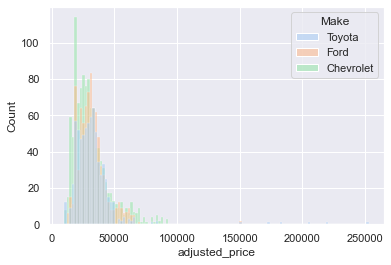

In [14]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
sns.set_palette("pastel")

list_makes= ['Chevrolet', 'Ford', 'Toyota']
condition_makes = df[df.Make.isin(list_makes) == True]
sns.histplot(data = condition_makes, x = 'adjusted_price', hue = 'Make')

# Remake the same histogram, but limit the x-axis from 0 to 100,000

(0.0, 100000.0)

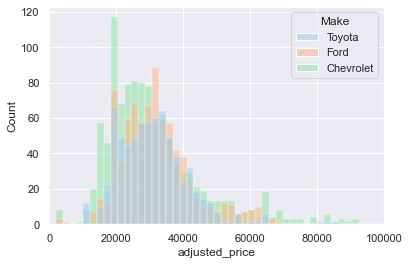

In [18]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
sns.set_palette("pastel") # just cus its cute~

sns.histplot(data = condition_makes, x = 'adjusted_price', hue = 'Make')
plt.xlim(0, 100000)

# Plot the relationship between Engine HP and highway MPG

<AxesSubplot:xlabel='Engine HP', ylabel='highway MPG'>

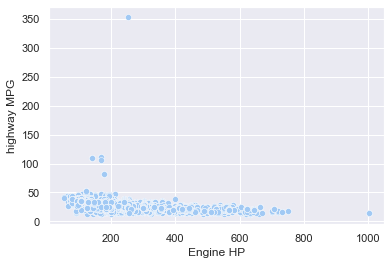

In [19]:
# Plot the relationship between Engine HP and highway MPG
sns.scatterplot (data = df, x = 'Engine HP', y = 'highway MPG')


# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

In [20]:
# Remove any statisical outliers from Engine HP and highway MPG
numerical_cols = ['Engine HP', 'highway MPG']
for col in numerical_cols:
    new_col_name = col + '_zscore'
    df[new_col_name] = stats.stats.zscore(df[col])
    df[new_col_name] = abs(df[new_col_name])

condition_eng = df['Engine HP_zscore'] < 3
condition_highway = df['highway MPG_zscore'] < 3

new_df = df[condition_eng & condition_highway]
new_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price,Engine HP_zscore,highway MPG_zscore
0,BMW,1 Series M,2011,premium unleaded (required),335.000,6.000,MANUAL,rear wheel drive,2.000,Compact,Coupe,26,19,3916,46135,46135,0.739,0.036
1,BMW,1 Series,2011,premium unleaded (required),300.000,6.000,MANUAL,rear wheel drive,2.000,Compact,Convertible,28,19,3916,40650,40650,0.422,0.231
2,BMW,1 Series,2011,premium unleaded (required),300.000,6.000,MANUAL,rear wheel drive,2.000,Compact,Coupe,28,20,3916,36350,36350,0.422,0.231
3,BMW,1 Series,2011,premium unleaded (required),230.000,6.000,MANUAL,rear wheel drive,2.000,Compact,Coupe,28,18,3916,29450,29450,0.214,0.231
4,BMW,1 Series,2011,premium unleaded (required),230.000,6.000,MANUAL,rear wheel drive,2.000,Compact,Convertible,28,18,3916,34500,34500,0.214,0.231


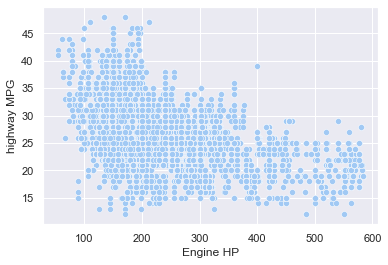

In [21]:
engine_vs_highway = sns.scatterplot(data = new_df, x = 'Engine HP', y = 'highway MPG')

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,adjusted_price,Engine HP_zscore,highway MPG_zscore
Year,1.000,0.337,-0.027,0.246,0.266,0.220,0.087,0.209,0.120,-0.005,0.036
Engine HP,0.337,1.000,0.788,-0.129,-0.424,-0.475,0.041,0.659,0.640,0.486,-0.086
Engine Cylinders,-0.027,0.788,1.000,-0.148,-0.615,-0.635,0.042,0.552,0.563,0.386,-0.034
Number of Doors,0.246,-0.129,-0.148,1.000,0.117,0.137,-0.059,-0.146,-0.182,-0.247,0.011
highway MPG,0.266,-0.424,-0.615,0.117,1.000,0.843,-0.025,-0.208,-0.232,-0.065,0.539
city mpg,0.220,-0.475,-0.635,0.137,0.843,1.000,-0.007,-0.233,-0.253,-0.058,0.445
Popularity,0.087,0.041,0.042,-0.059,-0.025,-0.007,1.000,-0.048,-0.048,-0.043,0.072
MSRP,0.209,0.659,0.552,-0.146,-0.208,-0.233,-0.048,1.000,0.986,0.566,0.057
adjusted_price,0.120,0.640,0.563,-0.182,-0.232,-0.253,-0.048,0.986,1.000,0.572,0.060
Engine HP_zscore,-0.005,0.486,0.386,-0.247,-0.065,-0.058,-0.043,0.566,0.572,1.000,0.135


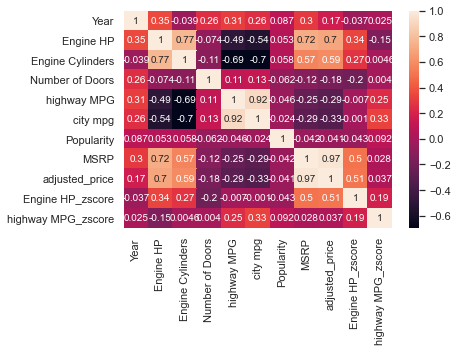

In [22]:
sns.heatmap(new_df.corr(), annot = True)
df.corr()

# What does this plot tell you about how Engine HP affects highway MPG?

In [23]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('There is a correlation of about -0.4 between Engine HP and highway MPG. Meaning there is a weak weak negative correlation between the two. So, as engine HP increases, highway MPG decreases and vice versa.')

There is a correlation of about -0.4 between Engine HP and highway MPG. Meaning there is a weak weak negative correlation between the two. So, as engine HP increases, highway MPG decreases and vice versa.


# Using a pairplot, display all of the linear relationships.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

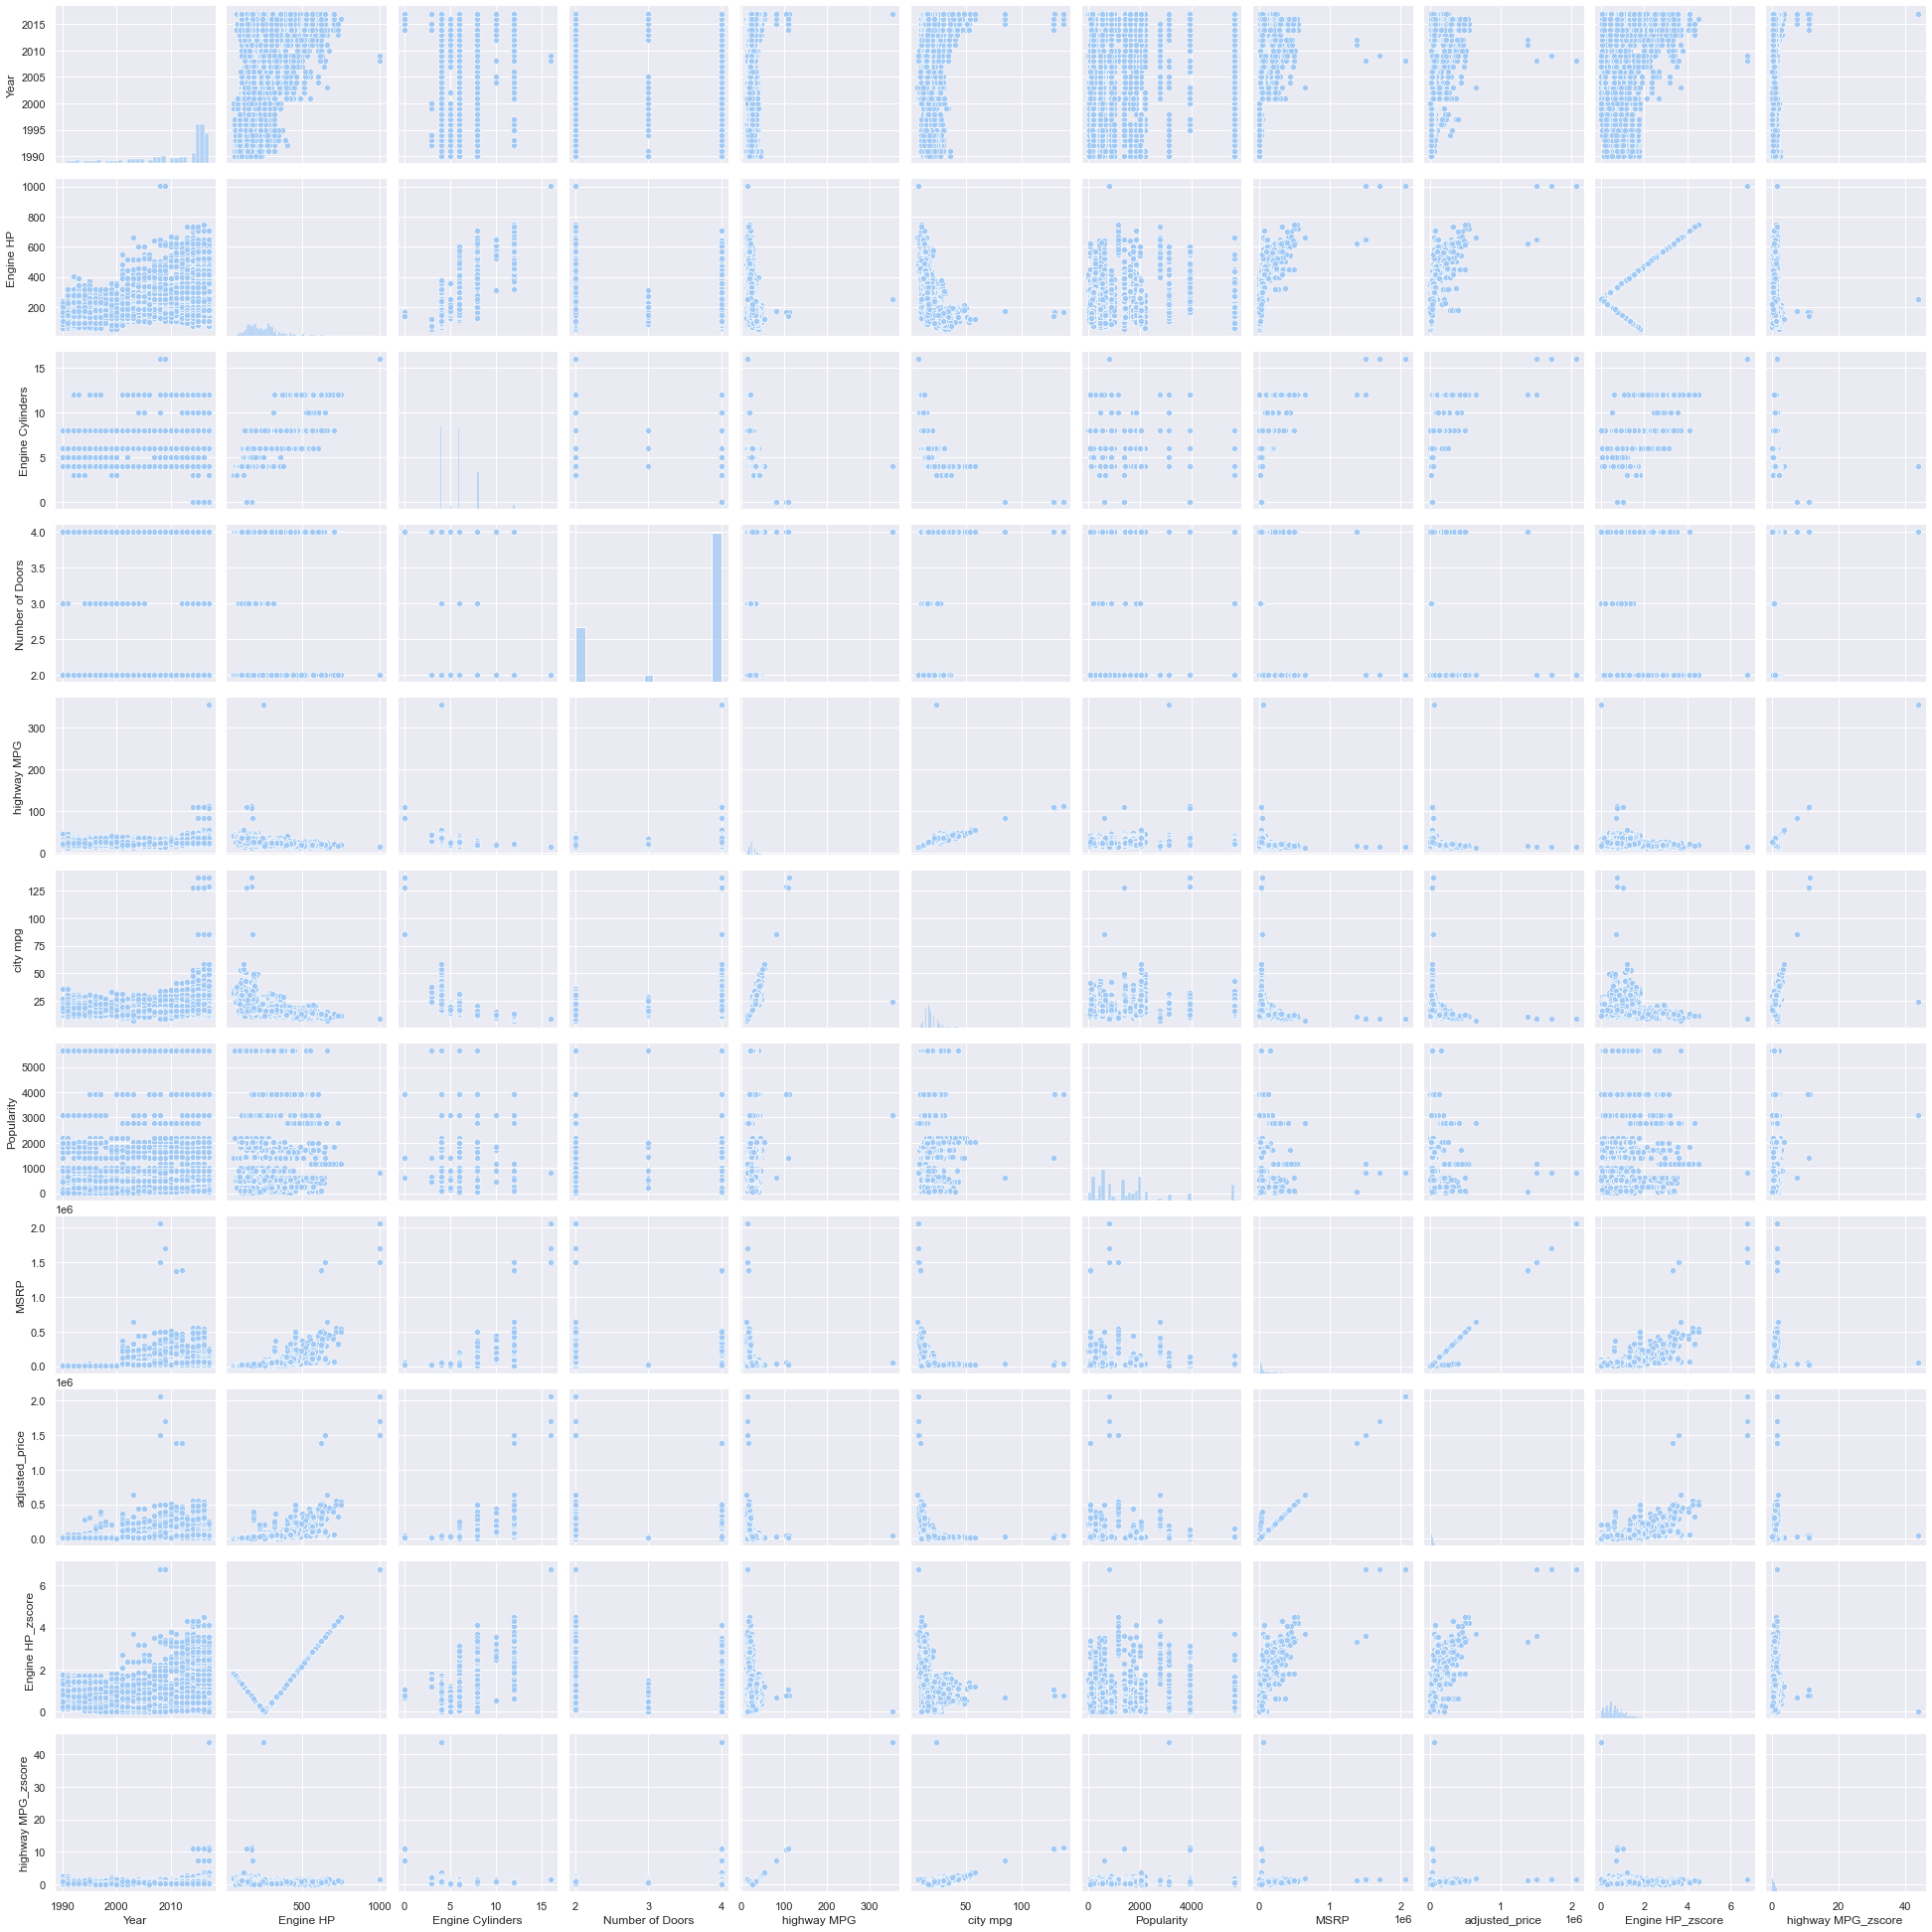

In [24]:
# Using a pairplot, display all of the linear relationship.
print(sns.pairplot(df))

In [25]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('highway MPG and city mpg')



highway MPG and city mpg


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

Strongest relationships with Engine HP are with Engine Cylinders with a positive correlation of 0.77 probably because maybe more Engine Cylinders lead to a higher Horse Power. I am not educated on cars, but I assume that the increase of Cylinders leads to more power


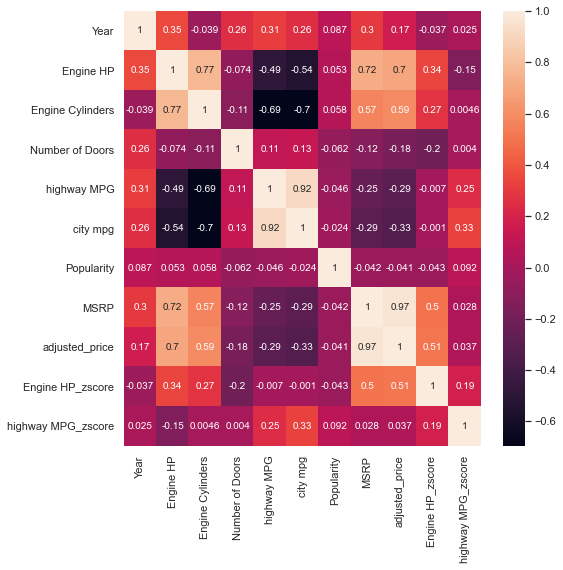

In [29]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
fig = plt.subplots(figsize=(8,8))
sns.heatmap(new_df.corr(), annot= True)
print('Strongest relationships with Engine HP are with Engine Cylinders with a positive correlation of 0.77 probably because maybe more Engine Cylinders lead to a higher Horse Power. I am not educated on cars, but I assume that the increase of Cylinders leads to more power.') 

# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [27]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well




# Extra Credit part 2
Rebuild the charts you made but using the interactive plotting library, Plotly:  https://plotly.com/python/.  
* You may need to install plotly by running `pip install plotly` in your terminal. 

In [28]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.
